#**Integración Monte Carlo**
Este método utiliza números aleatorios para estimar el valor de una integral definida. Considere una función integrable en el intervalo $(a,b)$ y suponga que desea evaluar $\int_{a}^{b}f(x)dx$.

Recordemos que 

$$\operatorname{E}[f(X)] = \dfrac{1}{b-a}\int_{a}^{b}f(x)dx$$

$$(b-a)\operatorname{E}[f(X)] = \int_{a}^{b}f(x)dx$$

$$(b-a)\dfrac{1}{N}\sum_{i=1}^Nf(x_i) ≈ \int_{a}^{b}f(x)dx$$

Esto implica que podemos encontrar una aproximación de un intervalo calculando el valor promedio de la función por el rango que integramos.



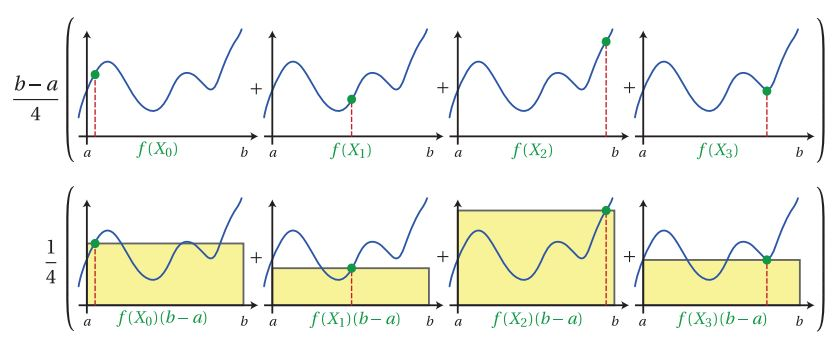

El algoritmo para evaluar la una integral de la forma $\int _{a}^{b}f(x)dx$ es sencillo, el cual debe seguir el siguiente procedimmiento

* Generar una muestra aleatoria de tamaño $N$ de $X \sim \operatorname (a,b)$.
* Evaluar cada elemento de la muestra en la función $f$.
* Calcular $\dfrac{b-a}{N}\sum_{i=1}^N f(x_i)$

###**Ejemplo 1:**
Vamos a resolver $\int_5^{20}\dfrac{x}{(x+1)^3} dx$

In [1]:
import numpy as np
import random

Ν = 10000
a = 5
b = 20
x = np.random.uniform(a,b,Ν)
f_x = x/((1+x)**3)

Respuesta = np.mean(f_x)*(b-a)
print(Respuesta)

0.10531255803073068


In [23]:
from scipy import integrate
import sympy as sp

x = sp.Symbol('x') 

f = x/((1+x)**3) 
#sp.integrate(f,x)
integral = sp.integrate(f,(x, 5, 20)) 
float(integral)



0.10629251700680271

In [3]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

#Límites de integración 
a= 5
b = 20

N = 1000
xrand = np.zeros(N)

for i in range(len(xrand)):
  xrand[i] = random.uniform(a,b)

def func(x):
  return x/((1+x)**3) #Función a integrar

sum = 0.0

for i in range(N):
  sum += func(xrand[i])

Respuesta = (b-a)/float(N)*sum
print('La integral desde 5 hasta 20 de x/((1+x)**3) es',Respuesta)

La integral desde 5 hasta 20 de x/((1+x)**3) es 0.10611541420912111


Text(0.5, 0, 'Areas')

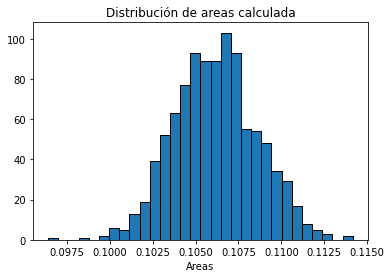

In [4]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

#Límites de integración 
a= 5
b = 20

areas = []

for i in range(N):
  xrand = np.zeros(N)

  for i in range(len(xrand)):
    xrand[i] = random.uniform(a,b)
    sum = 0.0

  for i in range(N):
    sum += func(xrand[i])

  Respuesta = (b-a)/float(N) * sum
  areas.append(Respuesta)

plt.title('Distribución de areas calculada')  
plt.hist(areas, bins = 30, ec = 'black')
plt.xlabel("Areas")

También podemos realizar integración para funciones de varias variables. El procedimiento es el mismo que antes, solo que ahora necesitamos muestrear sobre un dominio de mayor dimensión. Esto significa que para una función con dos variables $(x, y)$, el dominio tiene forma cuadrada; y para función con tres variables $(x, y, z)$, el dominio tiene forma de cubo.



Para simplificar, supongamos que estamos interesados ​​en resolve la integral doble $∫_Df(x,y)\,dxdy$, donde $D$ es una región en el plano. Los pasos para estimar esta integral son los siguientes:

* Genere una muestra aleatoria de puntos con una distribución uniforme en el dominio $D$.
* Evalúe $f$ en cada punto $(d_1,d_2)$ de la muestra aleatoria. Sea $W = f(D_1,D_2)$ el arreglo de valores.
* Calcule $Area(D)*mean(W)$, donde $Area(D)$ es el área determinada por $d_1, d_2$ y $mean(W)$ es el promedio de $W$. 

La estimación depende del tamaño de la muestra aleatoria (las muestras más grandes tienden a dar mejores estimaciones).




##**Ejemplo 1:**

Vamos a resolver $\int\int cos(x^4) + 3y^2 \,dx dy,\,\,\,\,\, x ∈ [4,6],\,\,\,\, y ∈ [0, 1].$

In [5]:
N = 100000
sum = 0
for i in range(N):
    x = np.random.uniform(4, 6)
    y = np.random.uniform(0, 1)
    sum += np.cos(x**4) + 3 * y**2 
Area = (6-4) * (1-0)
Area * sum/float(N)

2.0050068717482525

In [6]:
from scipy import integrate
import sympy as sp

x = sp.Symbol('x')
y = sp.Symbol('y') 

f = sp.cos(x**4) + 3 * y**2
#sp.integrate(f,x,y)
integral = sp.integrate(f, (x, 4, 6), (y, 0, 1)) 
float(integral)


2.005055086749674

##**Otro ejemplo:**

$\int_0^{\pi/2}\int_0^1 cos(x)\,exp(y)\,dydx$

cuya solución exacta es: $e-1 \approx 1.71828$

In [7]:
import numpy as np
N = 100000
sum = 0
for i in range(N):
    x = np.random.uniform(0, np.pi/2)
    y = np.random.uniform(0, 1)
    sum += np.cos(x)*np.exp(y) 
Area = (np.pi/2-0) * (1-0)
Area * sum/float(N)

1.7201271180329842

In [8]:
from scipy import integrate
import sympy as sp

x = sp.Symbol('x')
y = sp.Symbol('y') 

f = sp.cos(x)*sp.exp(y)
#sp.integrate(f,x,y)
integral = sp.integrate(f, (x, 0, sp.pi/2), (y, 0, 1)) 
float(integral)

1.7182818284590453

##**Ejemplo:**
La ecuación en coordenadas cartesianas de un toro cuyo eje de giro es el eje $z$, $R$ la distancia del centro del círculo al eje y $r$ el radio del círculo (sección trasversal), es:

$$x^2 + (\sqrt{y^2 + z^2} − R)^2 < r^2$$

Si un toroide está definido por la siguiente expresión

$$x^2 + (\sqrt{y^2 + z^2} − 5)^2 < 4$$

y confinamos el toro en una región rectangular, donde, $−2 < x < 2,\,\,\,\, -7< y < 7, \,\,\,\, -7 < z < 7$

Si queremos encontrar su volumen, definimos la siguiente integral $V = ∭f(x,y,x)dxdydz$



In [16]:
import numpy as np
from scipy import random 

def func(x,y,z):
    return x**2 + (np.sqrt(y**2 + z**2)-5)**2

def MCvolume(N=1000):
    #Limits of Integration
    x_min = -2
    x_max = 2 

    y_min = -7
    y_max = 7 

    z_min = -7 
    z_max = 7 

    Xrand = random.uniform(x_min,x_max,N)
    Yrand = random.uniform(y_min,y_max,N)
    Zrand = random.uniform(z_min,z_max,N)

    for i in range(len(Xrand)):
            Xrand[i] = random.uniform(x_min,x_max)
    for i in range(len(Yrand)):
            Yrand[i] = random.uniform(y_min,y_max)    
    for i in range(len(Zrand)):
            Zrand[i] = random.uniform(z_min,z_max)   

    integral = 0.0

    for i in range(N):
        if (func(Xrand[i],Yrand[i],Zrand[i]) < 4.0):
            integral += 1.0
    
    VolumeBox=(x_max-x_min)*(y_max-y_min)*(z_max-z_min)
    Volume = VolumeBox*integral/float(N) 

    return Volume

#Para N_intentos, cada uno usando N puntos aleatorios
N_intentos=10
Nrand=1000 #números aleatorios
vols=np.zeros(N_intentos)

for k in range(0, N_intentos):
    vols[k] = MCvolume(N=Nrand)

print("Para N_intentos, Nrand =", N_intentos, ", ", Nrand, "; Media=", np.mean(vols), ", desviación estándar=", np.std(vols))


Para N_intentos, Nrand = 10 ,  1000 ; Media= 389.0992 , desviación estándar= 14.255224311107845


##**Otra aplicación**
Consideremos la función de onda del electrón en el estado $2p$ en el átomo de hidrógeno (para los números cuánticos $n = 2$, $l = 1$ y $m = 0$). Expresada en unidades radiales adimensionales (ver Fitts 2002), esta función esta dada por:

$$\Psi_{210}(r,\theta,\phi)=\dfrac{1}{4\sqrt{2\pi}}re^{-r/2}cos\theta$$

Su norma viene dada por la integral de la densidad de probabilidad $|\Psi_{210}(r,\theta,\phi)|^2$

Por medio de estos métodos de integración, es posible verificar que la norma de \Psi_{210}(r,\theta,\phi), como la probabilidad total de encontrar un electrón, es, de hecho, unitaria:

$$\int_0^{∞}\int_0^{\pi}\int_0^{2\pi}|\Psi_{210}(r,\theta,\phi)|^2 r^2dr  sin\theta d\theta d\phi = 1$$


(Titus A. Beu. Problema 10.4)


#**Importance sampling**

El muestreo de importancia es un método para reducir la varianza en la integración de Monte Carlo al elegir un estimador cercano a la forma de la función real.

Se calcula a partir de:

$$I =\int_a^b dx f(x) = \int_a^b dx w(x)\dfrac{f(x)}{w(x)}$$

Si usamos la distribución de probabilidad para nuestros números aleatorios que incluyen $x(x)$, la integral puede ser aproximada a 

$$I=\langle\dfrac{f}{w}\rangle \simeq \dfrac{1}{N}\sum_{i=1}^{N}\dfrac{f(x_i)}{w(x_i)}$$

La mejora que surge de la ecuación anterior es que con una buena elección de la función $w(x) ∝ f (x)$, podemos hacer que $f (x)∕w(x)$ sea más constante y, por lo tanto, más fácil de integrar con precisión.

In [ ]:
from scipy import random
from scipy.stats import norm, uniform
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

Obtengamos la integral:
$$\int_0^{10} \exp(-2|x-5|)dx$$

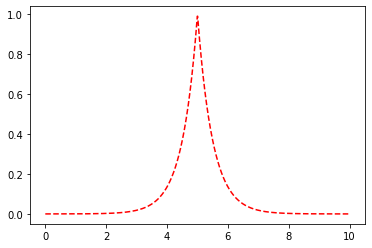

In [17]:
# Gráfica de la función
y = np.linspace(0,10,1000)
func = np.exp(-2*abs(y-5))

plt.plot(y,func, 'r--')
plt.show()

Usando importance sampling con distribución uniforme, tenemos

In [ ]:
# Usando importance sampling con distribución uniforme
Ν = int(1E5) # Samples
a = 0 # Limite inferior
b = 10 #l Limite superior


x = random.uniform(a, b, Ν)
f_x = 10*np.exp(-2*abs(x-5))
print('---'*10)
print('La media será: %.5f' %np.mean(f_x))
print('La varianza será: %.5f' %np.var(f_x))
print('---'*10)

------------------------------
La media será: 1.00239
La varianza será: 4.03790
------------------------------


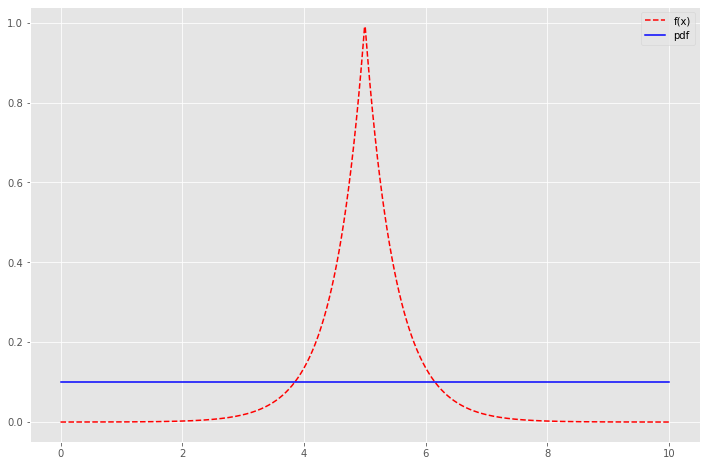

In [ ]:
# Grafiquemos la función con su respectiva distribución
p = np.ones(1000)*1/10
plt.plot(y,func, 'r--', label = 'f(x)')
plt.plot(y,p, 'b-', label = 'pdf')
plt.legend()
plt.show()


Veamos la distribución de valores

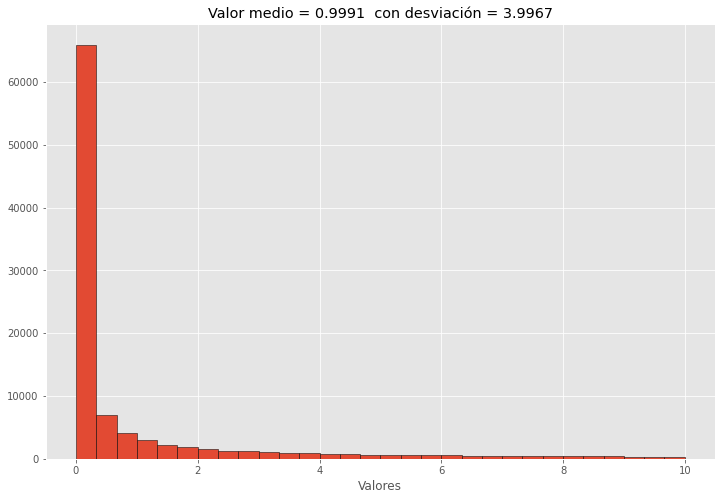

In [ ]:
# Veamos la distribución de valores
N = int(1E5)
integral = np.zeros(N)

for i in range(N):
    x = random.uniform(a, b)
    integral[i] = 10*np.exp(-2*abs(x-5))

media = np.mean(integral)
varianza = np.var(integral)

plt.title('Valor medio = %0.4f  con desviación = %0.4f' %(media, varianza))   
plt.hist(integral, bins = 30, ec = 'black')
plt.xlabel("Valores")
plt.show()

Usando importance sampling con una Gaussiana basados en el comportamiento de $f(x)$

In [ ]:
# Usando importance sampling con una Gaussiana basados en el comportamiento de f(x)
Ν = int(1E5)
mu = 5
sd = 1

x = random.normal(mu, sd, Ν)

f_x = np.exp(-2*abs(x-5))

#w_x = np.sqrt(2*np.pi*sd) * np.exp(((x-mu)/sd)**2/2)
w_x = 1/(sd*np.sqrt(2*np.pi)) * np.exp(-((x-mu)/sd)**2/2)

#importance = f_x * w_x
importance = f_x / w_x

print('---'*10)
print('La media será: %.5f' %np.mean(importance))
print('La varianza será: %.5f' %np.var(importance))
print('---'*10)

------------------------------
La media será: 0.99925
La varianza será: 0.35676
------------------------------


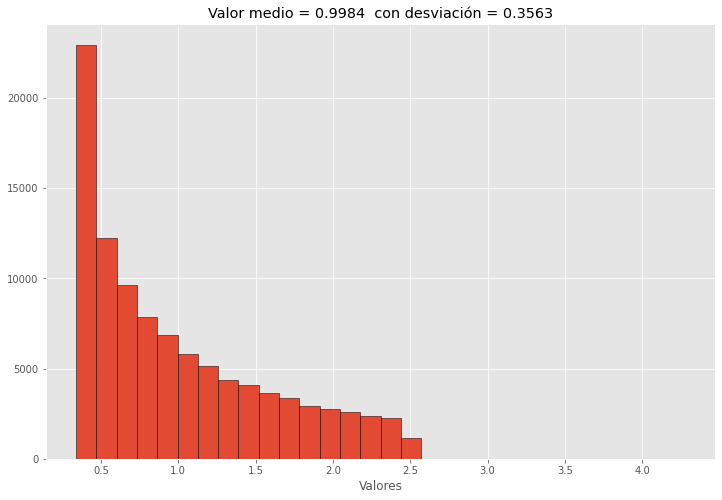

In [ ]:
# Veamos la distribución de valores
N = int(1E5)

mu = 5
sd = 1
integral = np.zeros(N)

for i in range(N):
    x = random.normal(mu, sd)
    f_x = np.exp(-2*abs(x-5))
    w_x = 1/(sd*np.sqrt(2*np.pi)) * np.exp(-((x-mu)/sd)**2/2)
    integral[i] = f_x / w_x

media = np.mean(integral)
varianza = np.var(integral)

plt.title('Valor medio = %0.4f  con desviación = %0.4f' %(media, varianza))   
plt.hist(integral, bins = 30, ec = 'black')
plt.xlabel("Valores")
plt.show()

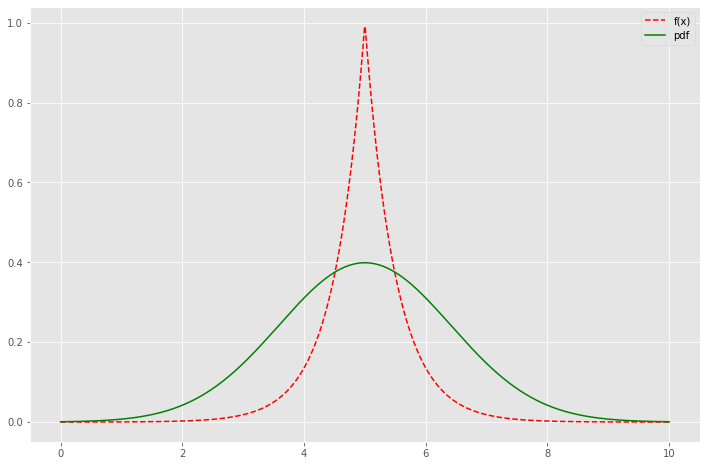

In [ ]:
y = np.linspace(0,10,1000)
func = np.exp(-2*abs(y-5))
w_y = 1/(sd*np.sqrt(2*np.pi))*np.exp(-(0.5*(y-mu)/sd)**2)

plt.plot(y,func, 'r--', label='f(x)')
plt.plot(y,w_y, 'g-', label = 'pdf')
plt.legend()
plt.show()

[1] Landau, R. H., Páez, M. J. (2018). Computational problems for physics. With Guided Solutions Using Python. CRC Press

[2] Krauth, W. (2006). Statistical mechanics: algorithms and computations (Vol. 13). OUP Oxford.

[3] Beu, T. A. (2014). Introduction to numerical programming: a practical guide for scientists and engineers using Python and C/C++. CRC Press.


